#### Reading and printing csv file

In [1]:
import pandas as pd
file = "C:\\Users\\ruchitha\\Downloads\\un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


#### Importing nlkt library to download  and print stopwords

In [2]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'myself', 'each', 'her', 'who', 'hasn', 'was', 'during', 'himself', 'as', 'on', 'off', 'when', 'our', 'too', 'why', "shan't", 'he', 'down', 'does', 'isn', 'most', 'same', "doesn't", 'has', 'against', 'while', 'under', 'yourself', 'into', 'just', "mustn't", 'ours', 'shouldn', "aren't", 've', "couldn't", 'before', "you'd", 's', 'here', 'it', 'my', 'me', 'hers', 'itself', "mightn't", 'weren', 'm', 'you', 'only', 'mightn', 'after', 'haven', 'then', 'other', 'doesn', 'from', "won't", 'both', "that'll", 'with', 'further', 'some', 'herself', 'ain', 'nor', 'did', 'or', 'y', 'there', "hadn't", 'their', 'an', 'i', 'aren', "wasn't", 'by', "needn't", 'these', 'no', 'mustn', 't', 'more', 'about', 'they', 'a', 'for', 'had', 'are', 'being', 'in', "weren't", 'him', 'between', 'am', 'what', 'once', 'not', 'should', 'through', 'over', "hasn't", "you've", 'such', 'of', 'up', 'wouldn', 'whom', "isn't", 'at', 'hadn', 'shan', 'she', "shouldn't", 'which', 'that', 'having', 'we', 'yours', 'few', 're', 'can',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruchitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Setting pipeline that converts text to lower case and remove stop words

In [3]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]


#### Creating a new column 'tokens' in dataframe which has result after tokenising and removing stopwords from each row of 'text' column

In [4]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

#### Counting the frequency of words after removing stopwords and tokenizing to understand the distribution of words.

In [5]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq']) #creating a dataframe freq_df
freq_df = freq_df.query('freq >= 1') #filters out tokens with less than 1 frequency
freq_df.index.name ='token'
freq_df = freq_df.sort_values('freq', ascending=False) #sorts the dataframe in descending order
freq_df.head(10) #displays top 10 rows in the dataframe

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


#### Using worldcloud library to visualize the frequency of words in the text

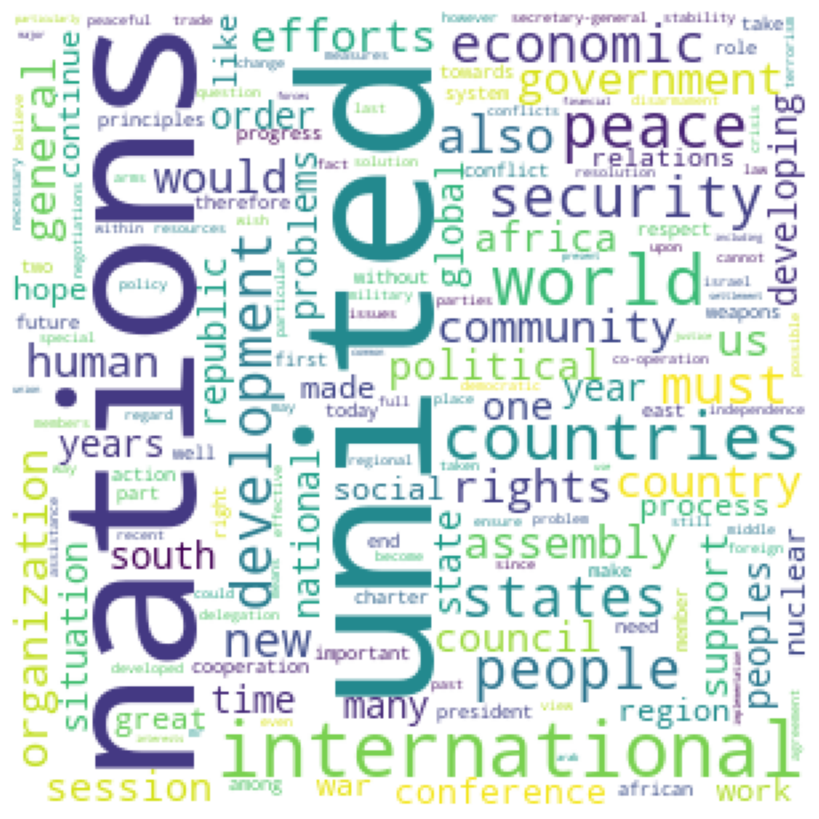

In [6]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() ) #fits the word frequencies from dataframe into worldcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Implementing a function 'compute_idf' to compute the idf of tokens in the dataframe

In [7]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)
    


#### Calculating TFIDF for each token in the dataframe

In [8]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


#### Creating a wordcould visualization using TFIDF scores in the dataframe

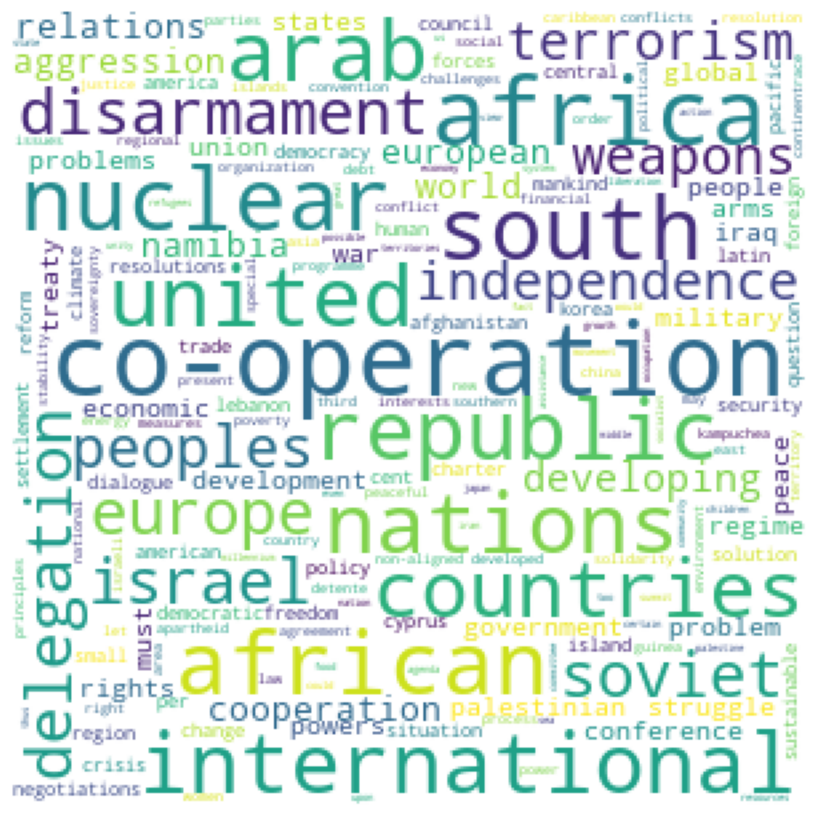

In [9]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Defining a function 'count_keywords' that takes tokens and keywords as input to count the occurance of each keyword in the token list 

In [10]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [11]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


####  visualizing the frequencies of keywords over the years using a heatmap generated with Seaborn.

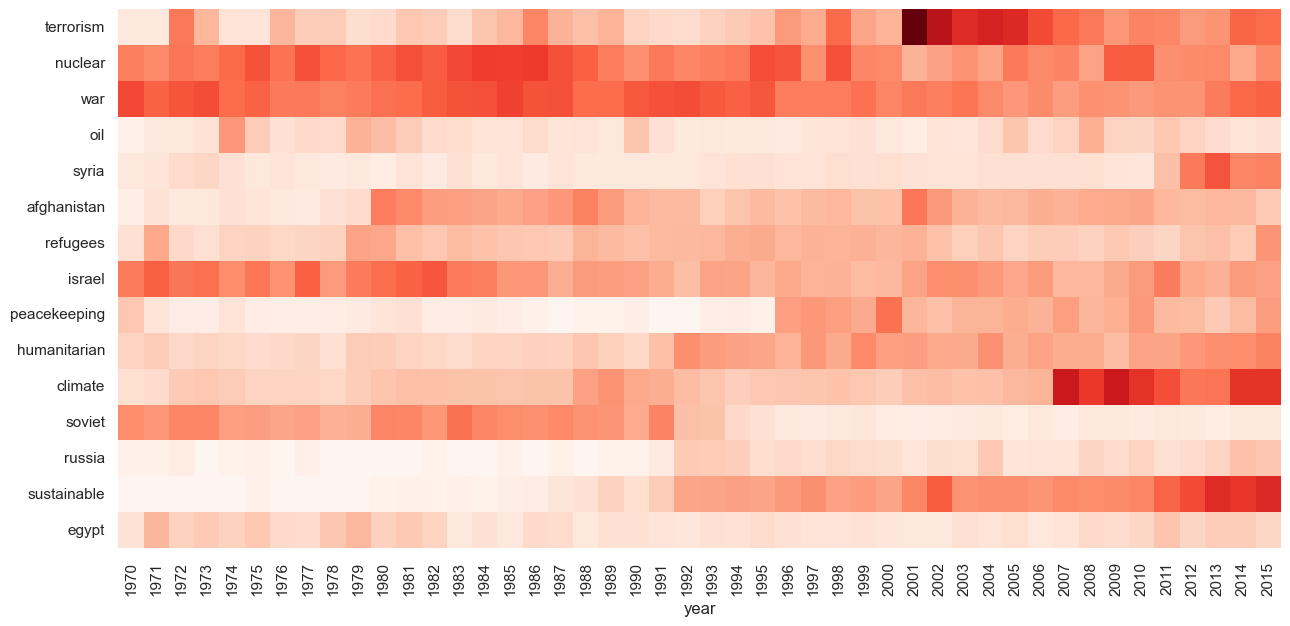

In [12]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)


#### Filtered the dataframe with selected countries 'AUS','AFG','ALB','BEL','CAN','CMR','COG','COL'

In [13]:
df= df[df['country'].isin(['AUS','AFG','ALB','BEL','CAN','CMR','COG','COL'])]
df.head(20)#displaying top 20 rows of the dataframe

,session,year,country,country_name,speaker,position,text,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,"[may, first, convey, president, congratulation...",4092
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,"[pleasure, extend, mr, president, warmest, con...",2575
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...","[doubt, us, coming, rostrum, wonders, usefulne...",2064
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...,"[general, assembly, fortunate, indeed, preside...",878
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...,"[year, ago, came, acting, president, organizat...",1387
10,25,1970,COG,Congo,Mr. ICKONGA,NaN,122.\t I cannot begin my intervention without...,"[cannot, begin, intervention, without, referri...",1443
11,25,1970,COL,Colombia,Mr. VASQUEZ CARRIZOSA,NaN,"Mr. President, this visit to the United Nation...","[mr, president, visit, united, nations, provid...",3093
70,26,1971,AFG,Afghanistan,Mr. SHAJFIQ,NaN,"82.\tMr. President, at the outset, I wish to c...","[mr, president, outset, wish, congratulate, wh...",1943
71,26,1971,ALB,Albania,Mr. NASE,NaN,110.\t This session of the General Assembly i...,"[session, general, assembly, meeting, time, ne...",3931
73,26,1971,AUS,Australia,Mr. BOWEN,NaN,"38.\t I should like, on behalf of Australia,,...","[like, behalf, australia, extend, congratulati...",1682


#### Counting the frequency of words after removing stopwords and tokenizing to understand the distribution of words in the filtered dataframe

In [14]:
pipeline = [str.lower, tokenize, remove_stop]
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name ='token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
united,6336
nations,6224
international,5349
world,4523
countries,4138
peace,3379
states,3103
security,3071
people,3041


#### Visualizing the frequency of words using wordcloud library

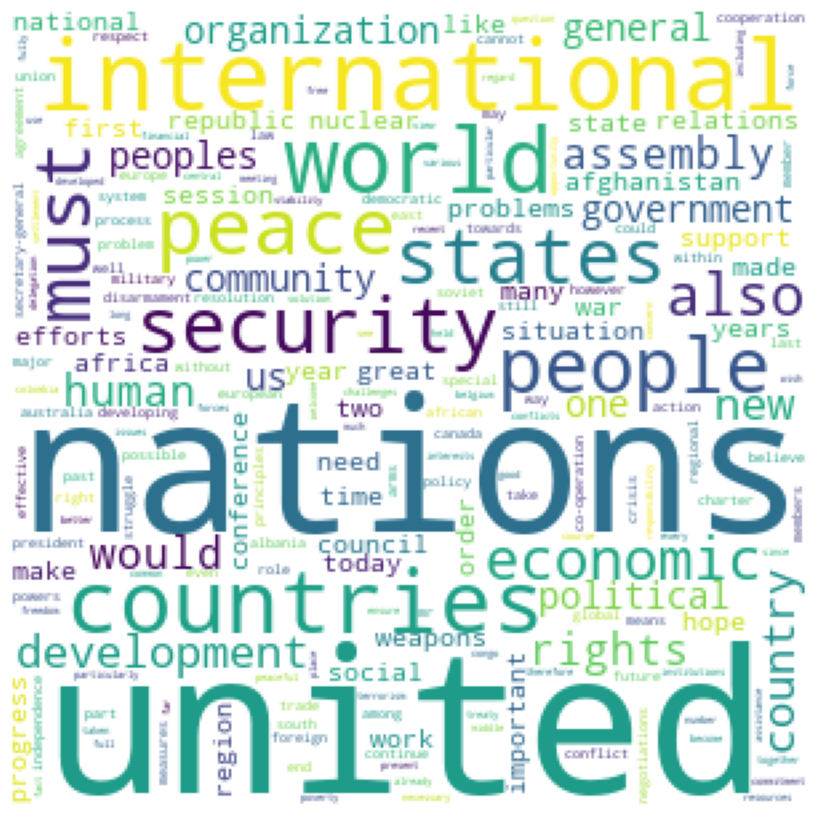

In [15]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Calculating IDF scores for tokens in the dataframe

In [16]:
idf_df = compute_idf(df)
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
united,6336,633.600000
nations,6224,691.556267
international,5349,594.333945
world,4523,489.939607
countries,4138,482.960384


#### Visualizing the frequency of words using TFIDF scores with wordcloud

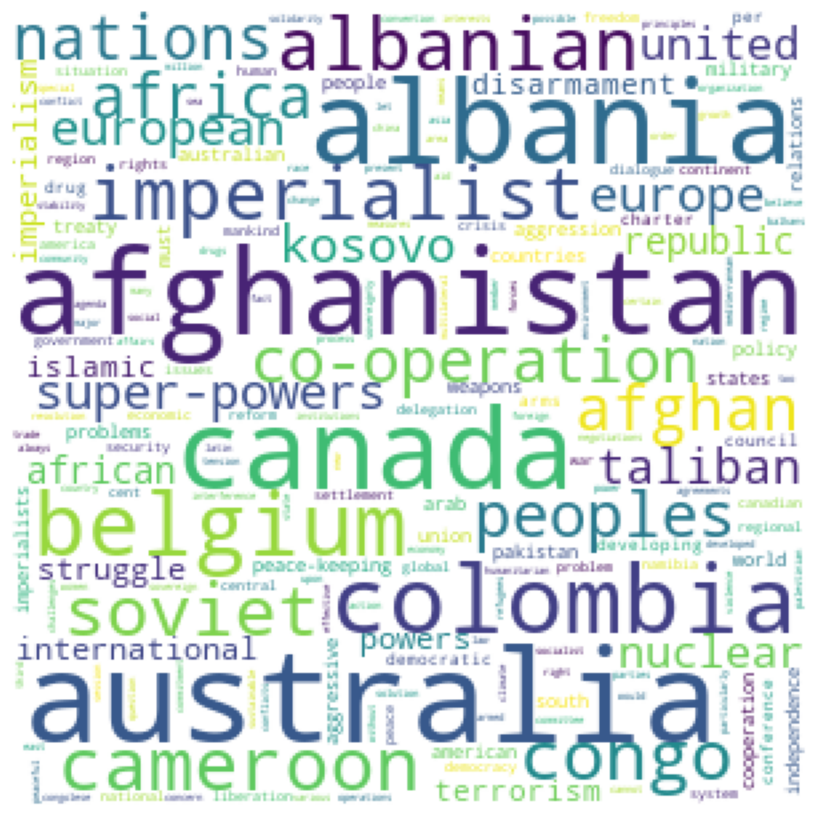

In [17]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### visualizing the frequencies of keywords over the filtered countries using a heatmap generated with Seaborn

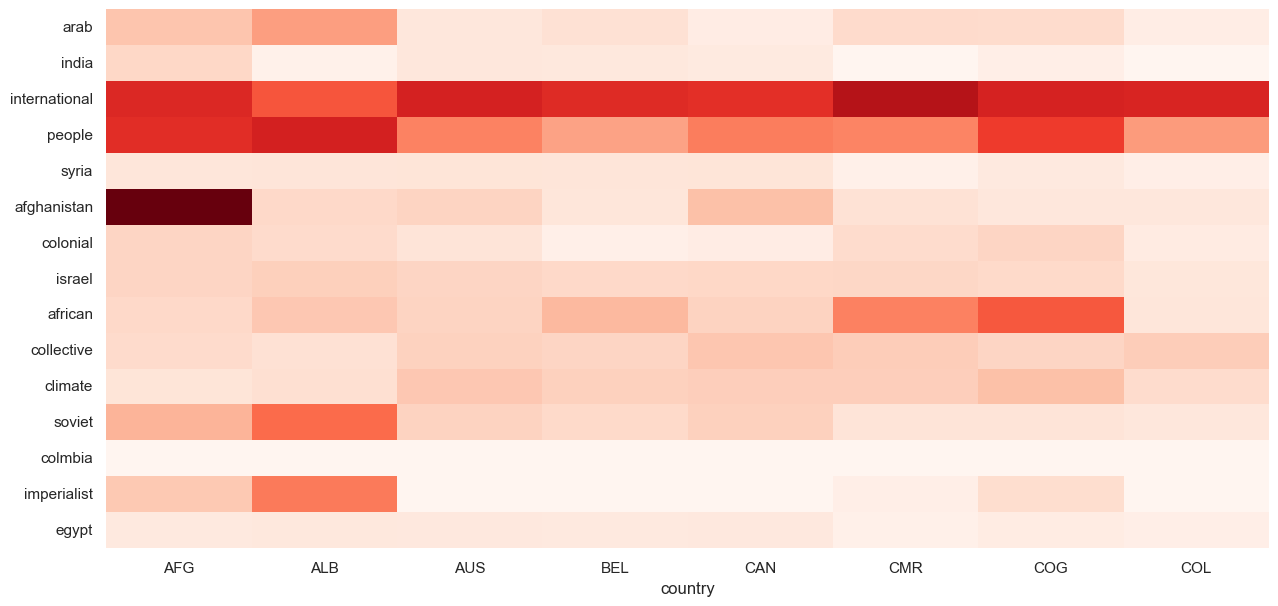

In [18]:
import seaborn as sns
keywords = ['arab', 'india', 'international', 'people',
            'syria', 'afghanistan', 'colonial', 'israel', 'african', 
            'collective', 'climate', 'soviet','colmbia', 'imperialist','egypt']  
freq_df = count_keywords_by(df, by='country', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('country')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)